# Data Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
x_test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
y_test = pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')

# Data Cleaning & Understanding

In [3]:
# dosyaları birleştirdik 
test = pd.merge(x_test, y_test, on='Id')
all_data = pd.concat([train, test], axis=0)

In [4]:
# null var mı diye baktık
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# Cleaning

In [5]:
from sklearn.impute import SimpleImputer  # for missing data

nan_columns = ['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 
               'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
               'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
               'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']

imputer_num = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
all_data[nan_columns] = imputer_num.fit_transform(all_data[nan_columns])

In [6]:
# null'ları sildik
all_data.dropna(axis=1, how="any", inplace=True)

<AxesSubplot:>

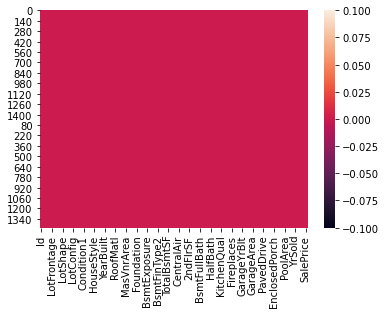

In [7]:
# burada yine null var mı diye baktık
sns.heatmap(all_data.isnull())

In [8]:
pd.set_option('display.max_rows', all_data.shape[0]+1)

# korelasyonuna baktık
cor_matrix = all_data.corr()
cor_matrix.style.background_gradient(cmap='coolwarm')
print(pd.DataFrame(cor_matrix['SalePrice'].sort_values(ascending=False)))

               SalePrice
SalePrice       1.000000
GrLivArea       0.588010
OverallQual     0.550911
TotRmsAbvGrd    0.469800
GarageCars      0.469236
GarageArea      0.464467
1stFlrSF        0.462865
TotalBsmtSF     0.453089
FullBath        0.433710
YearBuilt       0.362066
Fireplaces      0.353567
MasVnrArea      0.351883
YearRemodAdd    0.350032
LotArea         0.296497
LotFrontage     0.294727
BsmtFinSF1      0.272281
2ndFlrSF        0.272140
GarageYrBlt     0.265986
WoodDeckSF      0.238381
OpenPorchSF     0.236376
BedroomAbvGr    0.229611
HalfBath        0.228837
BsmtUnfSF       0.175312
BsmtFullBath    0.147705
ScreenPorch     0.082308
PoolArea        0.081039
MoSold          0.067222
3SsnPorch       0.029979
MiscVal        -0.000037
BsmtFinSF2     -0.007398
Id             -0.011630
BsmtHalfBath   -0.012734
LowQualFinSF   -0.015395
YrSold         -0.039064
OverallCond    -0.065785
EnclosedPorch  -0.070698
KitchenAbvGr   -0.071760
MSSubClass     -0.087910


In [9]:
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [10]:
important_columns = ['Id', 'SalePrice', 'GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'Fireplaces', 'MasVnrArea', 'YearRemodAdd', 'LotArea', 'LotFrontage', 'BsmtFinSF1', '2ndFlrSF', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'BedroomAbvGr', 'HalfBath']

all_data = all_data[important_columns]

In [11]:
# ohe kullandık
categorical_cols = all_data.select_dtypes(include=np.object).columns
all_data = pd.get_dummies(all_data, prefix=categorical_cols)

# burada indexleri ayarladık
result = all_data.Id.to_numpy()
result = np.insert(result, 0, 0, axis=0)
result = np.delete(result, len(all_data))

# burada indexi yeniledik
data = all_data.set_index(keys=result)

<ipython-input-11-839149f36052>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_cols = all_data.select_dtypes(include=np.object).columns


In [12]:
data

Id      SalePrice  GrLivArea  OverallQual  TotRmsAbvGrd  GarageCars  \
0        1  208500.000000       1710            7             8         2.0   
1        2  181500.000000       1262            6             6         2.0   
2        3  223500.000000       1786            7             6         2.0   
3        4  140000.000000       1717            7             7         3.0   
4        5  250000.000000       2198            8             9         3.0   
5        6  143000.000000       1362            5             5         2.0   
6        7  307000.000000       1694            8             7         2.0   
7        8  200000.000000       2090            7             7         2.0   
8        9  129900.000000       1774            7             8         2.0   
9       10  118000.000000       1077            5             5         1.0   
10      11  129500.000000       1040            5             5         1.0   
11      12  345000.000000       2324            9            11         3.0   
12      13  144000.000000        912            5             4         1.0   
13      14  279500.000000       1494            7             7         3.0   
14      15  157000.000000       1253            6             5         1.0   
15      16  132000.000000        854            7             5         2.0   
16      17  149000.000000       1004            6             5         2.0   
17      18   90000.000000       1296            4             6         2.0   
18      19  159000.000000       1114            5             6         2.0   
19      20  139000.000000       1339            5             6         1.0   
20      21  325300.000000       2376            8             9         3.0   
21      22  139400.000000       1108            7             6         1.0   
22      23  230000.000000       1795            8             7         2.0   
23      24  129900.000000       1060            5             6         2.0   
24      25  154000.000000       1060            5             6         1.0   
25      26  256300.000000       1600            8             7         3.0   
26      27  134800.000000        900            5             5         2.0   
27      28  306000.000000       1704            8             7         3.0   
28      29  207500.000000       1600            5             6         1.0   
29      30   68500.000000        520            4             4         1.0   
30      31   40000.000000       1317            4             6         1.0   
31      32  149350.000000       1228            5             6         1.0   
32      33  179900.000000       1234            8             7         2.0   
33      34  165500.000000       1700            5             6         2.0   
34      35  277500.000000       1561            9             6         2.0   
35      36  309000.000000       2452            8             9         3.0   
36      37  145000.000000       1097            5             6         2.0   
37      38  153000.000000       1297            5             5         2.0   
38      39  109000.000000       1057            5             5         1.0   
39      40   82000.000000       1152            4             6         0.0   
40      41  160000.000000       1324            6             6         2.0   
41      42  170000.000000       1328            5             5         1.0   
42      43  144000.000000        884            5             5         2.0   
43      44  130250.000000        938            5             5         1.0   
44      45  141000.000000       1150            5             6         1.0   
45      46  319900.000000       1752            9             6         2.0   
46      47  239686.000000       2149            7             6         2.0   
47      48  249700.000000       1656            8             7         3.0   
48      49  113000.000000       1452            4             8         0.0   
49      50  127000.000000        955            5         

In [13]:
# pd.set_option('display.max_columns', all_data.shape[1]+1)
#indexleri set et

In [14]:
# SalePrice ve Id gibi ihtiyacımız olmayan kolonları sildik
data.drop('SalePrice', axis=1, inplace=True)
data.drop('Id', axis=1, inplace=True)

# x ve y değerlerimizi ayarladık
x = data
y = pd.DataFrame(all_data['SalePrice'])

In [15]:
x_train= data.iloc[0:1461, :]
x_test = data.iloc[1461:len(data) + 1, :]
y_train = y.iloc[0:1461, :]
y_test = y.iloc[1461:len(data) + 1, :]

## Scaling

In [16]:
# verilerimizi aynı dünyaya getirdik yani ölçekledik
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1)) # range is [0, 1]

X_train = pd.DataFrame(scaler.fit_transform(x_train))
X_test = pd.DataFrame(scaler.fit_transform(x_test))

In [17]:
# Standardizayson
from sklearn import preprocessing

x_train_names = x_train.columns
x_test_names = x_test.columns

scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

X_train = pd.DataFrame(X_train, columns=x_train_names)
X_test = pd.DataFrame(X_test, columns=x_test_names)

# Normalizasyon
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1)) # range is [0, 1]

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

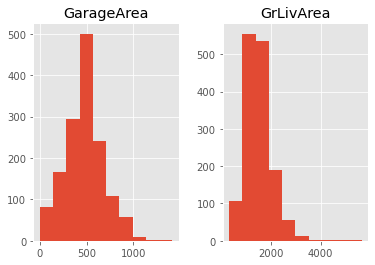

In [18]:
df = x_train[['GarageArea', 'GrLivArea']]

plt.style.use('ggplot')
df.hist(column=df.columns)
plt.show()

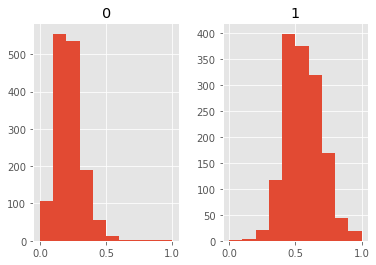

In [19]:
df = X_train[[0, 1]]

plt.style.use('ggplot')
df.hist(column=df.columns)
plt.show()

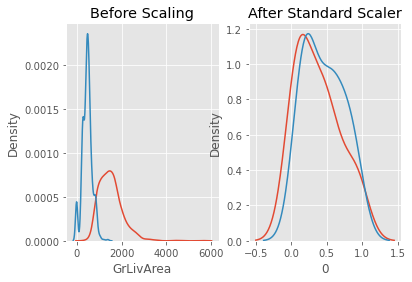

In [20]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['GrLivArea'], ax=ax1)
sns.kdeplot(x_train['GarageArea'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(X_train.iloc[0], ax=ax2)
sns.kdeplot(X_train.iloc[4], ax=ax2)
plt.show()

In [21]:
x_train

GrLivArea  OverallQual  TotRmsAbvGrd  GarageCars  GarageArea  1stFlrSF  \
0          1710            7             8         2.0       548.0       856   
1          1262            6             6         2.0       460.0      1262   
2          1786            7             6         2.0       608.0       920   
3          1717            7             7         3.0       642.0       961   
4          2198            8             9         3.0       836.0      1145   
5          1362            5             5         2.0       480.0       796   
6          1694            8             7         2.0       636.0      1694   
7          2090            7             7         2.0       484.0      1107   
8          1774            7             8         2.0       468.0      1022   
9          1077            5             5         1.0       205.0      1077   
10         1040            5             5         1.0       384.0      1040   
11         2324            9            11         3.0       736.0      1182   
12          912            5             4         1.0       352.0       912   
13         1494            7             7         3.0       840.0      1494   
14         1253            6             5         1.0       352.0      1253   
15          854            7             5         2.0       576.0       854   
16         1004            6             5         2.0       480.0      1004   
17         1296            4             6         2.0       516.0      1296   
18         1114            5             6         2.0       576.0      1114   
19         1339            5             6         1.0       294.0      1339   
20         2376            8             9         3.0       853.0      1158   
21         1108            7             6         1.0       280.0      1108   
22         1795            8             7         2.0       534.0      1795   
23         1060            5             6         2.0       572.0      1060   
24         1060            5             6         1.0       270.0      1060   
25         1600            8             7         3.0       890.0      1600   
26          900            5             5         2.0       576.0       900   
27         1704            8             7         3.0       772.0      1704   
28         1600            5             6         1.0       319.0      1600   
29          520            4             4         1.0       240.0       520   
30         1317            4             6         1.0       250.0       649   
31         1228            5             6         1.0       271.0      1228   
32         1234            8             7         2.0       484.0      1234   
33         1700            5             6         2.0       447.0      1700   
34         1561            9             6         2.0       556.0      1561   
35         2452            8             9         3.0       691.0      1132   
36         1097            5             6         2.0       672.0      1097   
37         1297            5             5         2.0       498.0      1297   
38         1057            5             5         1.0       246.0      1057   
39         1152            4             6         0.0         0.0      1152   
40         1324            6             6         2.0       440.0      1324   
41         1328            5             5         1.0       308.0      1328   
42          884            5             5         2.0       504.0       884   
43          938            5             5         1.0       308.0       938   
44         1150            5             6         1.0       300.0      1150   
45         1752            9             6         2.0       576.0      1752   
46         2149            7             6         2.0       670.0      1518   
47         1656            8             7         3.0       826.0      1656   
48         1452            4             8         0.0         0.0       736   
49    

In [22]:
# Normalizasyon
from sklearn import preprocessing

df = x_train[['GarageArea', 'GrLivArea']]
names = df.columns

scaler = preprocessing.StandardScaler()

pd.set_option('display.precision', 4)
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.describe()

GarageArea   GrLivArea
count  1.4610e+03  1.4610e+03
mean   1.3010e-16 -2.5077e-17
std    1.0003e+00  1.0003e+00
min   -2.2134e+00 -2.2480e+00
25%   -6.4162e-01 -7.3670e-01
50%    3.2016e-02 -9.7150e-02
75%    4.8111e-01  4.9672e-01
max    4.4200e+00  7.8553e+00

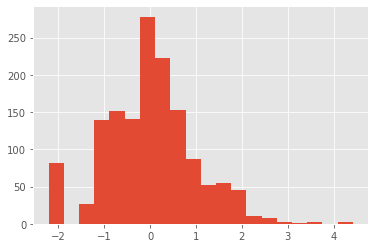

In [23]:
plt.style.use('ggplot')
plt.hist(scaled_df.GarageArea, bins=20)
plt.show()

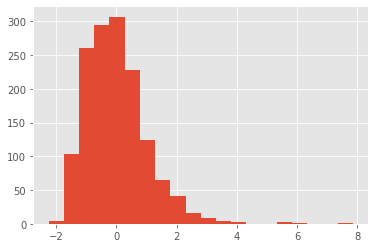

In [24]:
plt.style.use('ggplot')
plt.hist(scaled_df.GrLivArea, bins=20)
plt.show()

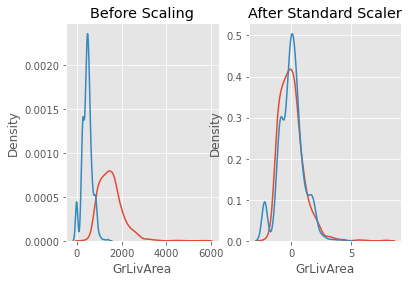

In [25]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1.set_title('Before Scaling')
sns.kdeplot(df['GrLivArea'], ax=ax1)
sns.kdeplot(df['GarageArea'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['GrLivArea'], ax=ax2)
sns.kdeplot(scaled_df['GarageArea'], ax=ax2)
plt.show()

# Understanding

### Histogram

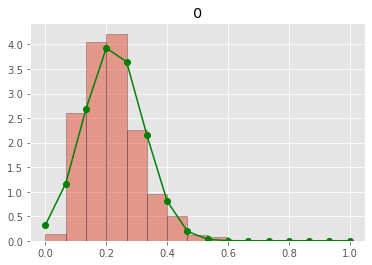

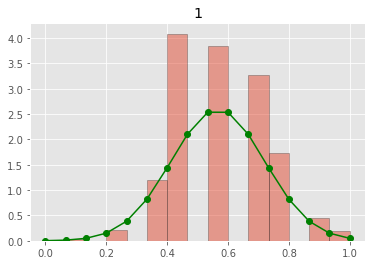

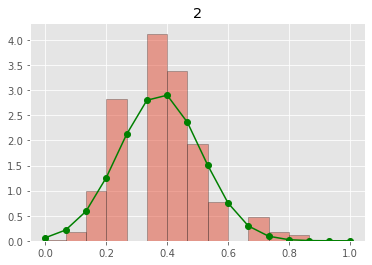

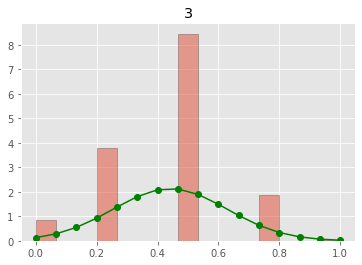

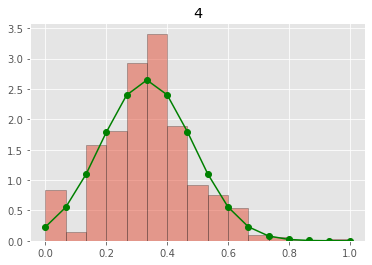

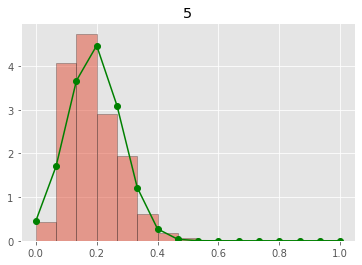

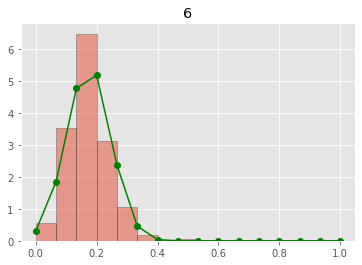

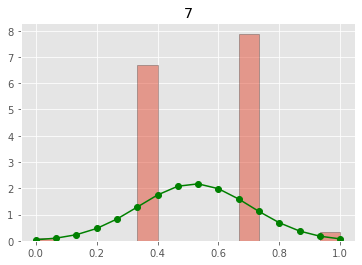

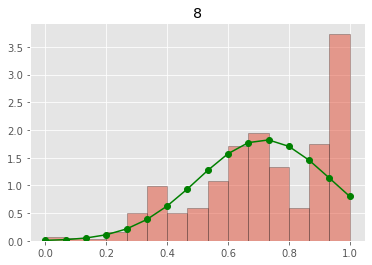

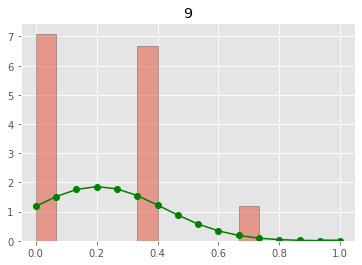

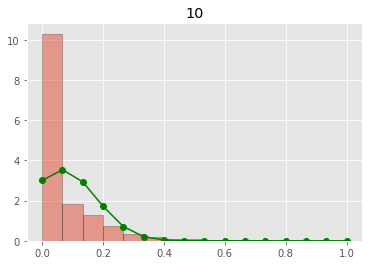

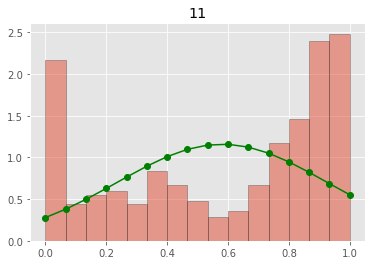

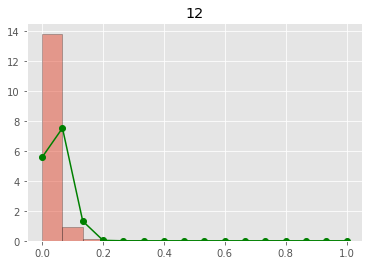

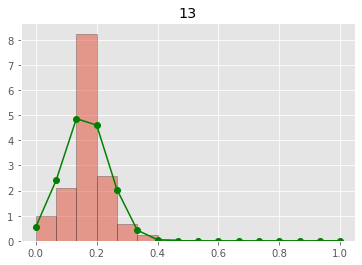

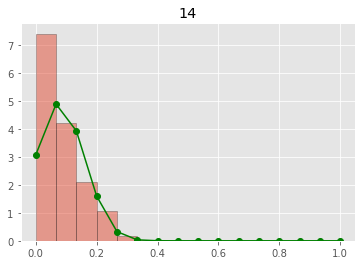

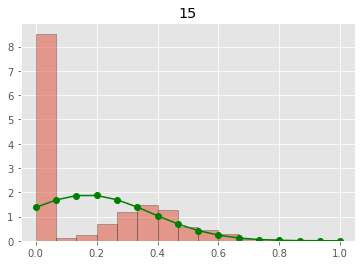

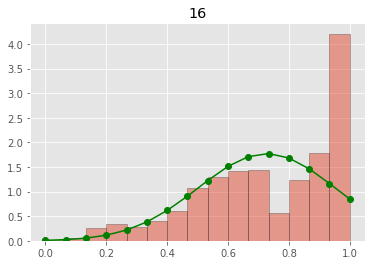

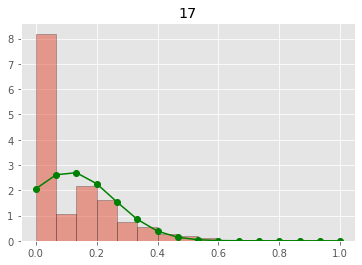

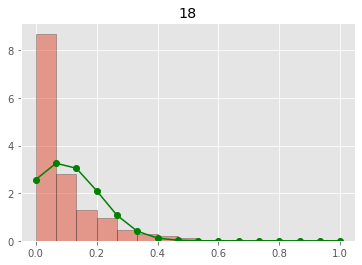

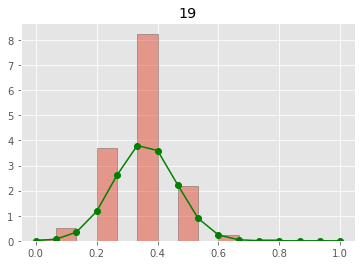

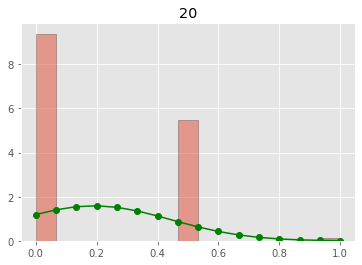

In [26]:
def draw_hist(df):
    for columns in df.columns:
        _, bins, _ = plt.hist(df[columns], bins=15, density=1, alpha=0.5, ec='black')
        mu, sigma = stats.norm.fit(df[columns])
        best_fit_line = stats.norm.pdf(bins, mu, sigma)
        
        plt.plot(bins, best_fit_line, 'g-o')
        plt.title(columns)
        plt.show()
        

X_train = pd.DataFrame(X_train)
draw_hist(X_train)

### Boxplot

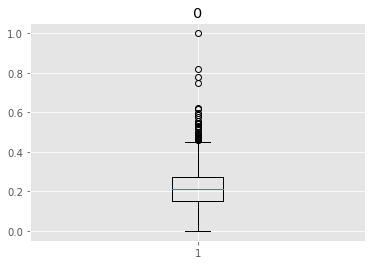

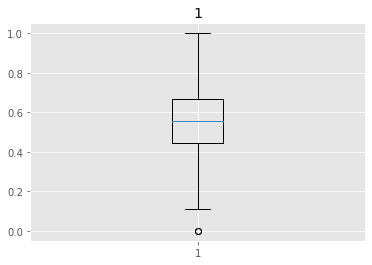

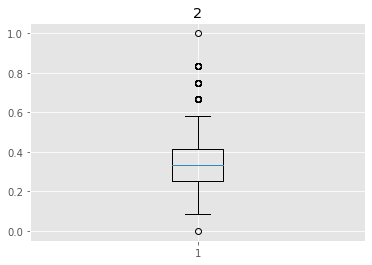

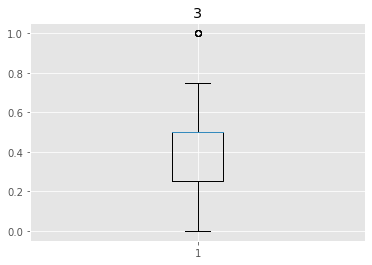

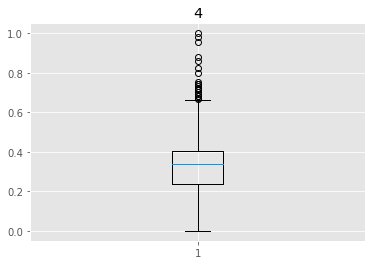

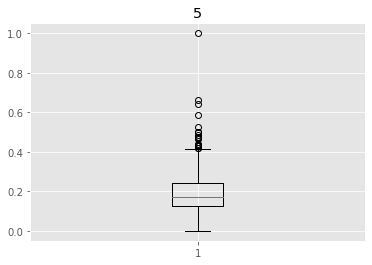

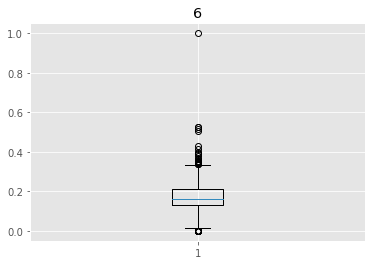

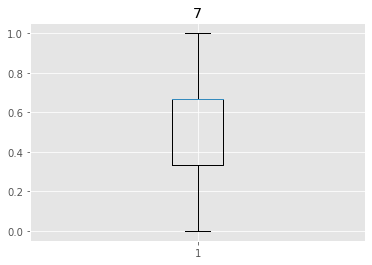

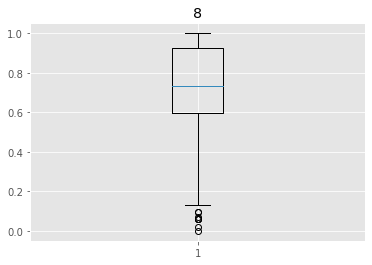

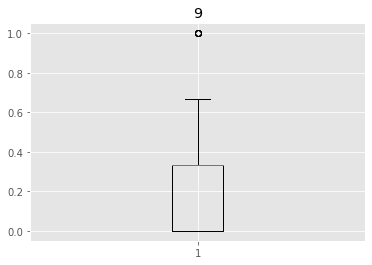

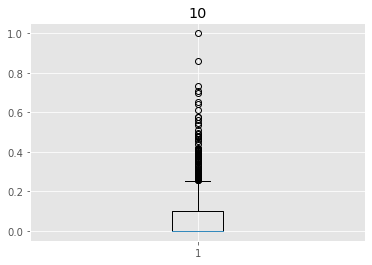

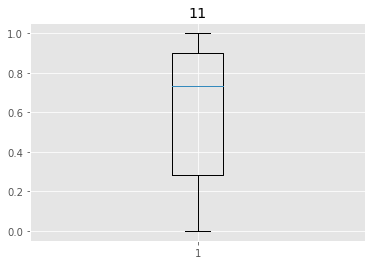

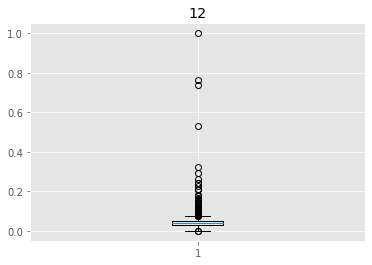

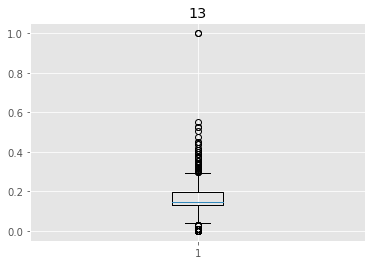

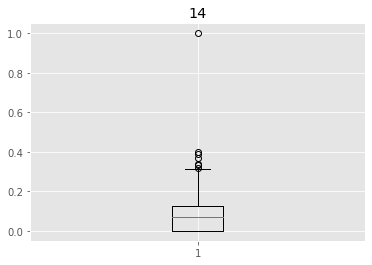

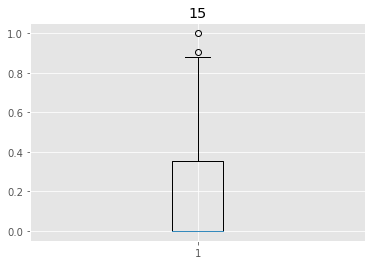

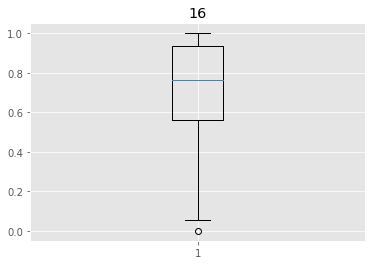

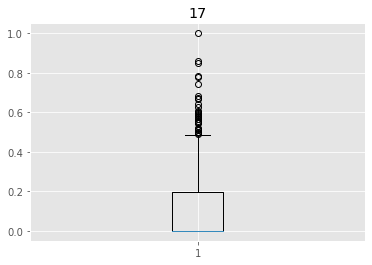

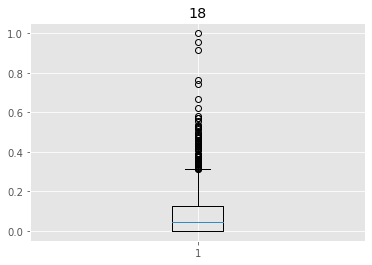

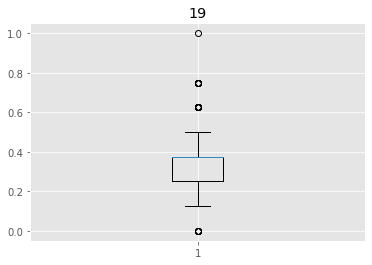

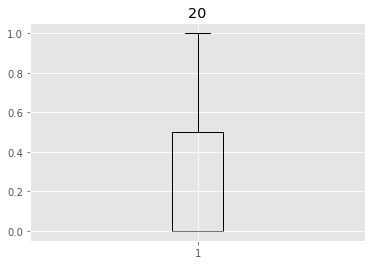

In [27]:
def draw_boxplot(df):
    for columns in df.columns:
        plt.boxplot(df[columns])
        plt.title(columns)
        plt.show()

        
draw_boxplot(X_train)

### Kernel Density Estimation (KDE)

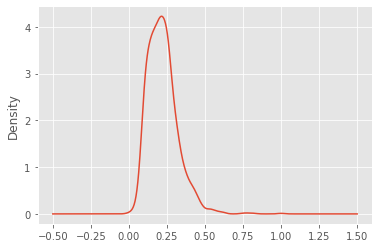

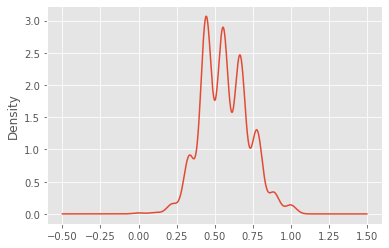

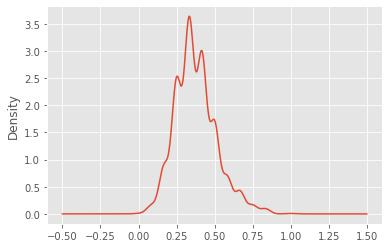

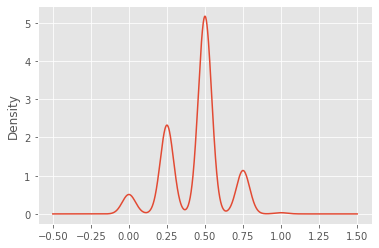

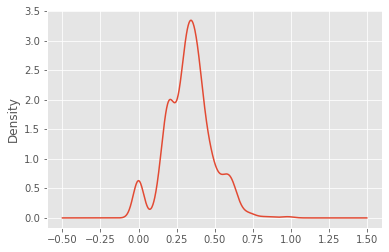

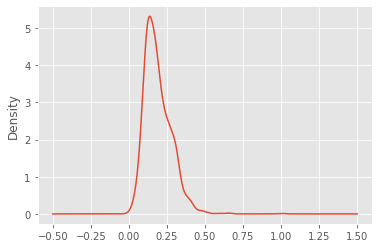

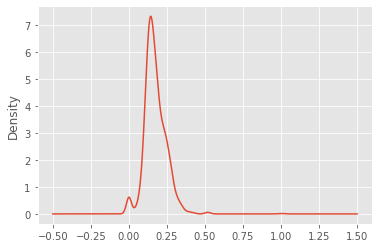

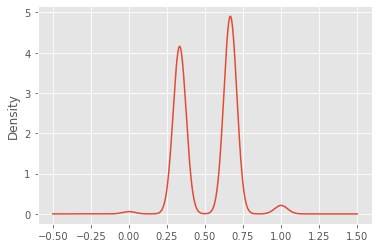

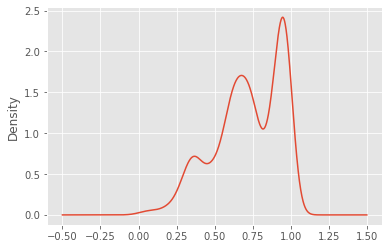

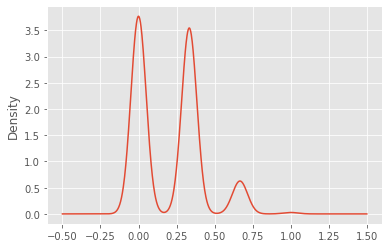

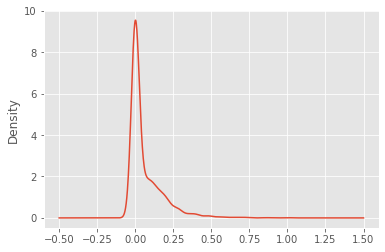

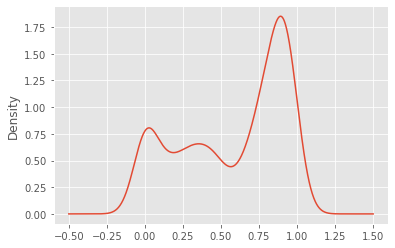

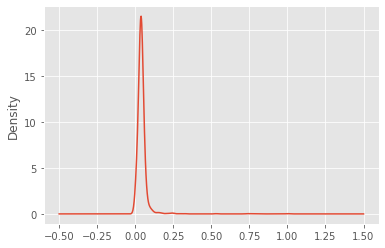

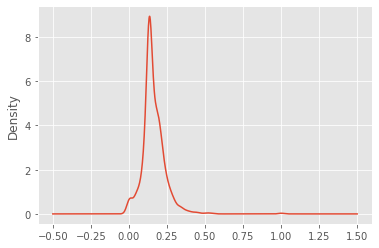

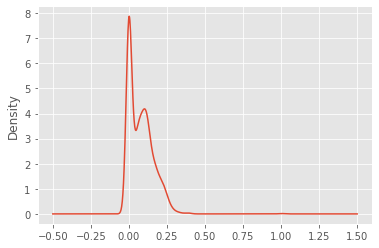

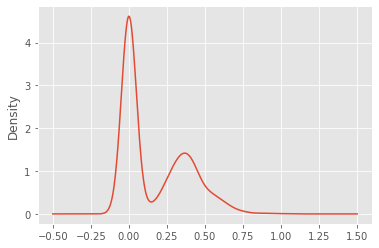

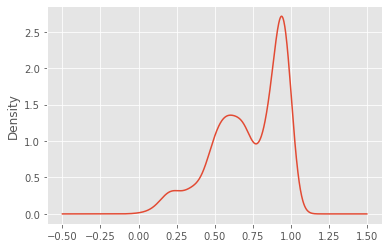

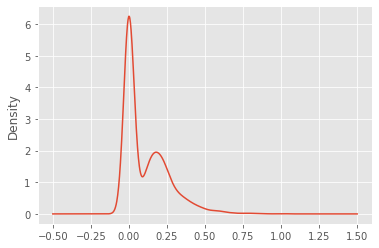

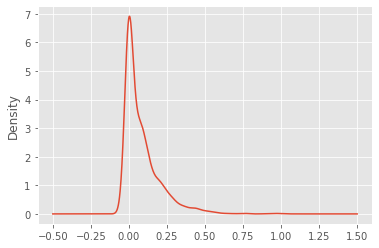

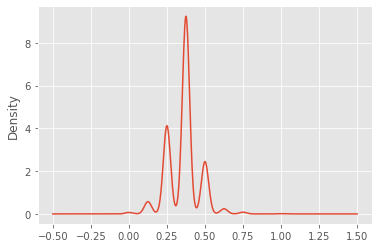

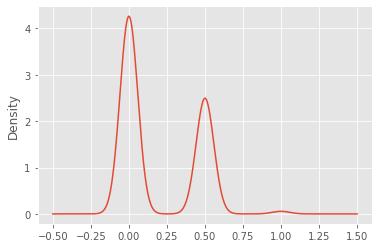

In [28]:
# Normalizasyon fonksiyonu
def normalize(df):
    result = df.copy()
    max_value = df.max()
    min_value = df.min()
    result = (df - min_value) / (max_value - min_value)
    
    return result

# Değişkenleri normalize ediyoruz.
for columns in X_train.columns:
    normal = normalize(X_train[columns])
    
    # KDE plotu yeniden çizdiriyoruz.
    normal.plot.kde()
    plt.show()



### QQ Plot

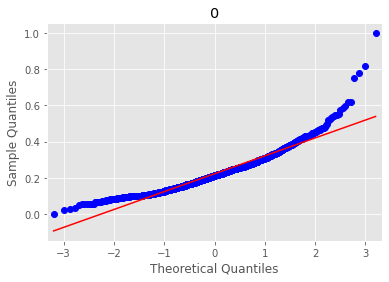

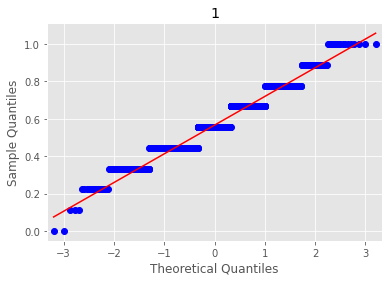

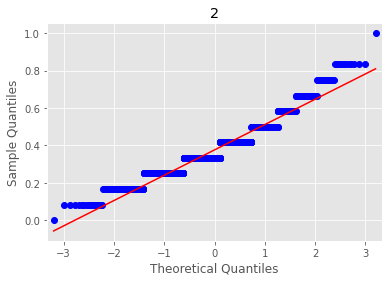

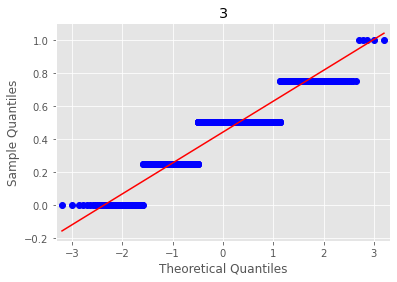

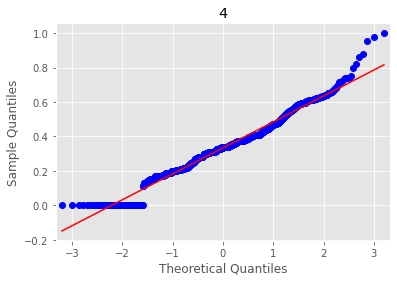

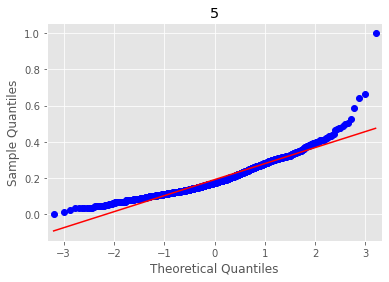

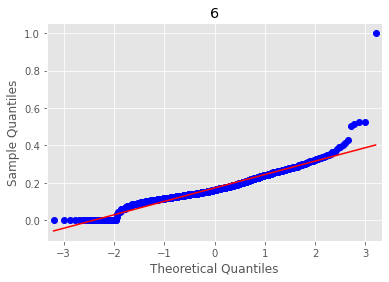

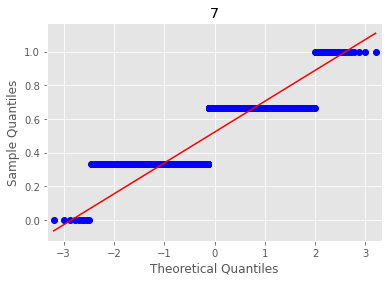

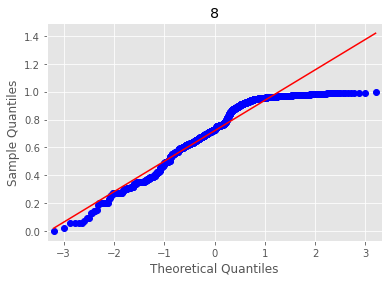

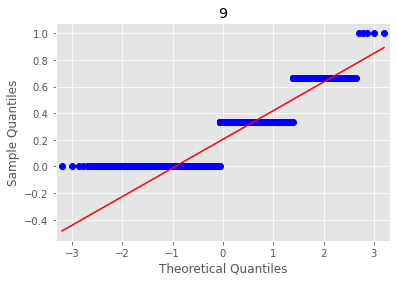

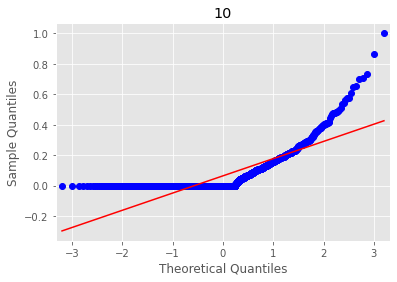

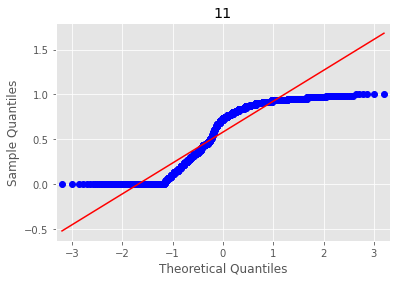

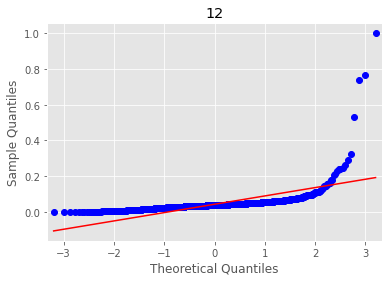

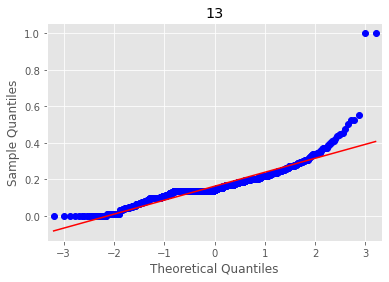

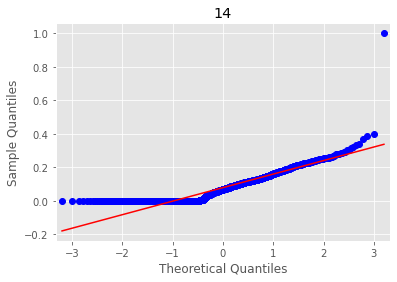

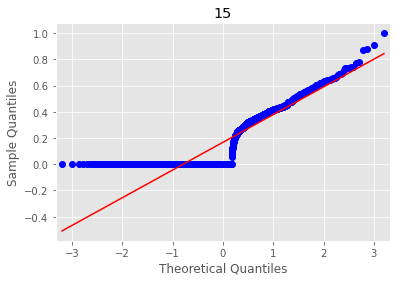

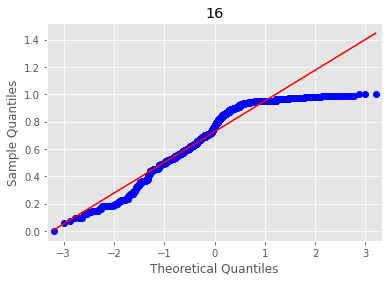

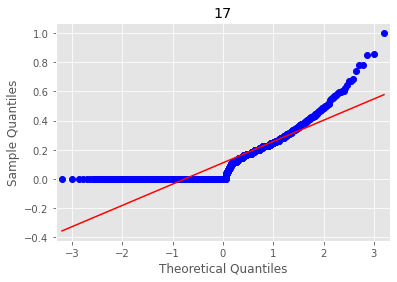

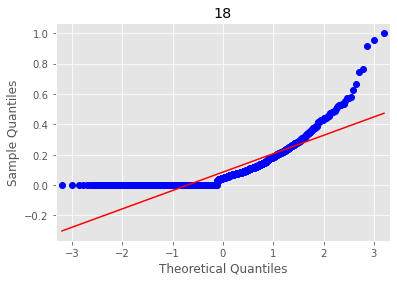

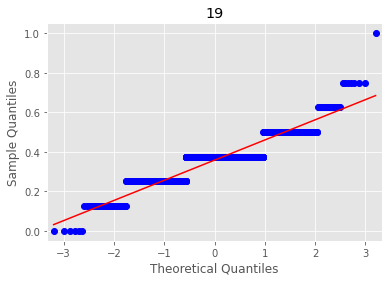

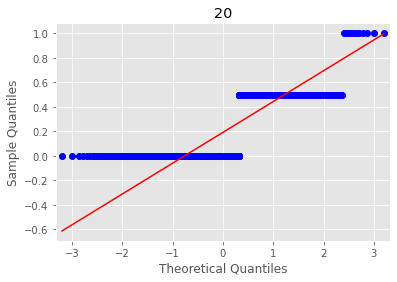

In [29]:
import statsmodels.api as sm

for columns in X_train.columns:
    sm.qqplot(X_train[columns], line='s')
    plt.title(columns)
    
    plt.show()

### Violin Plot

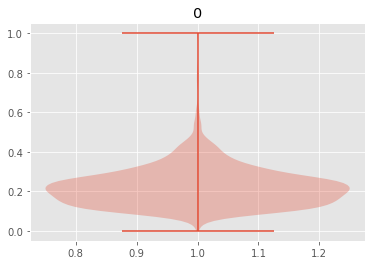

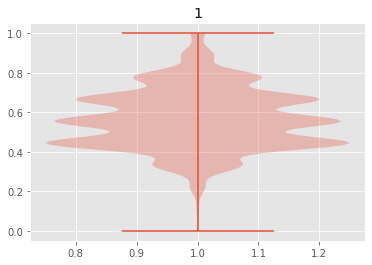

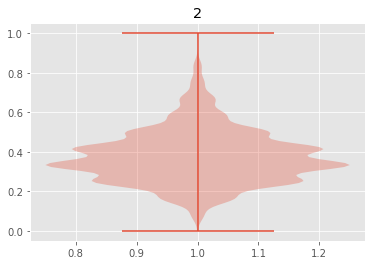

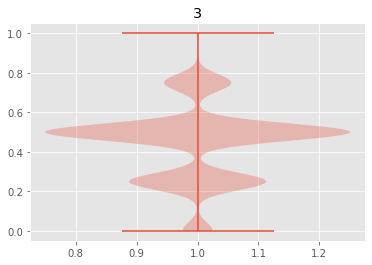

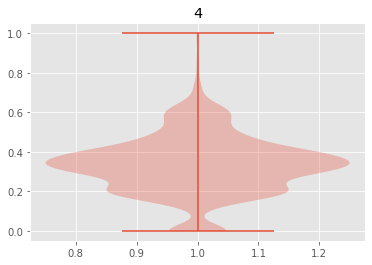

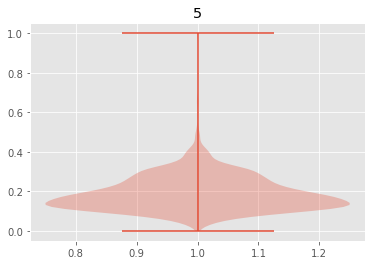

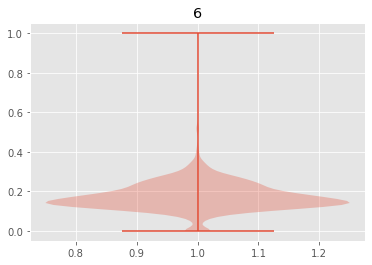

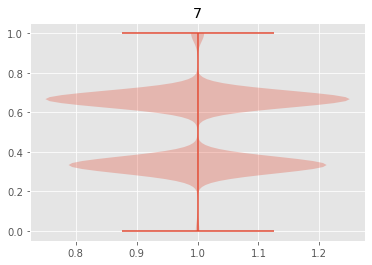

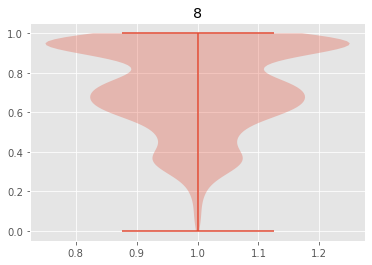

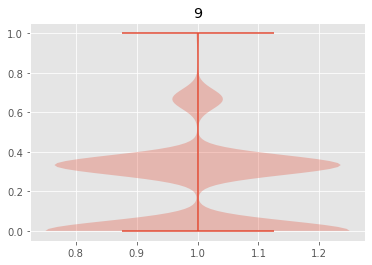

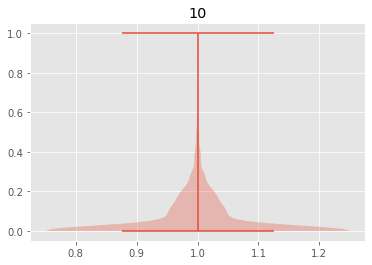

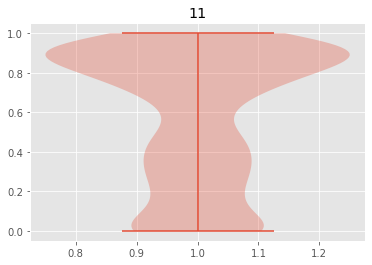

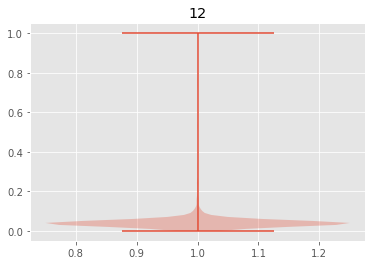

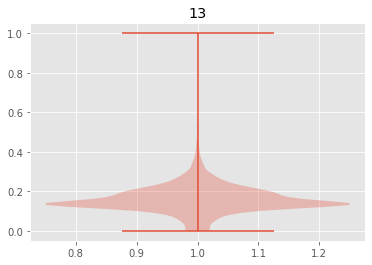

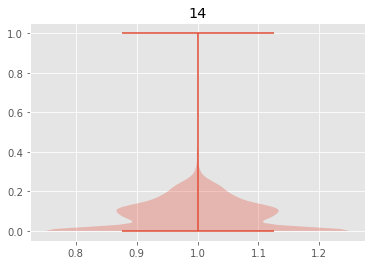

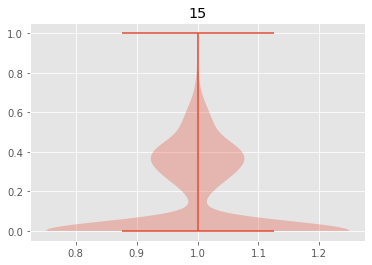

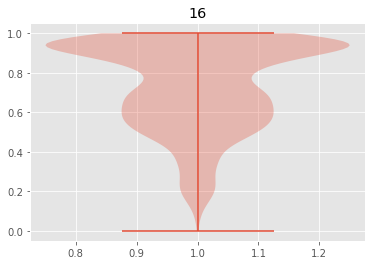

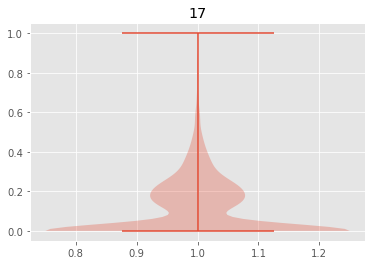

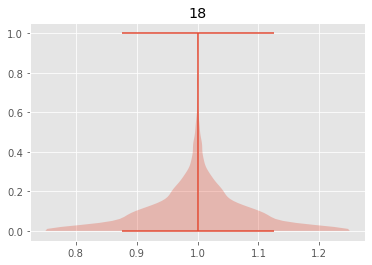

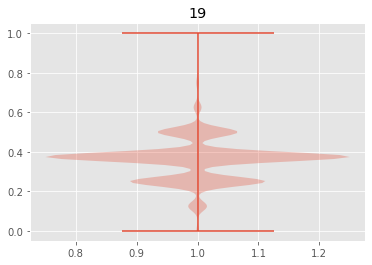

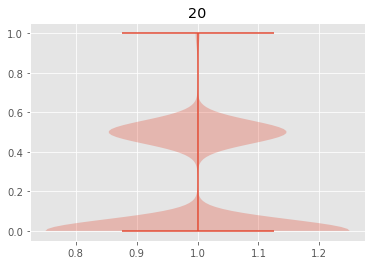

In [30]:
for columns in X_train.columns:
    fig, ax = plt.subplots()
    
    ax.violinplot(X_train[columns])
    plt.title(columns)
    
    plt.show()

### Skewness ve kurtosis

In [31]:
# Dağılımın çarpıklık katsayısı sıfıra yakın ise simetrik
# olarak kabul edebiliriz, 
# basıklık için Fisher tanımına göre hesaplanan değerden 
# 3 çıkartırız ama kurtosis fonksiyonu varsayılan olarak 
# Fisher tanımını kullanmaz. Yani, normal dağılıma uygun 
# bir veri seti için basıklık değeri 3 olmalıdır. Fisher
# tanımını kullanmak isterseniz fisher = True yapmanız
# gerekli.
for columns in X_train.columns:
    print(columns)
    print(f'Skewness: {stats.skew(X_train[columns])} Kurtosis: {stats.kurtosis(X_train[columns])}')

0
Skewness: 1.3649750477892866 Kurtosis: 4.8704055330165215
1
Skewness: 0.21794324693516018 Kurtosis: 0.09204458903009316
2
Skewness: 0.6766322748970267 Kurtosis: 0.8739177535480116
3
Skewness: -0.3405763830504377 Kurtosis: 0.21349775199764087
4
Skewness: 0.1783116264702935 Kurtosis: 0.9056065086802052
5
Skewness: 1.376332614073948 Kurtosis: 5.725119643972388
6
Skewness: 1.5237370373909305 Kurtosis: 13.21027395567247
7
Skewness: 0.037864558311457554 Kurtosis: -0.8589738218335725
8
Skewness: -0.6122961991647653 Kurtosis: -0.44136951320542517
9
Skewness: 0.6498813882839336 Kurtosis: -0.2198884254034552
10
Skewness: 2.675930808422669 Kurtosis: 10.109995474738737
11
Skewness: -0.501210475539875 Kurtosis: -1.2743436424751755
12
Skewness: 12.1989375852573 Kurtosis: 202.67742132723936
13
Skewness: 2.5006876478901643 Kurtosis: 21.10013577310773
14
Skewness: 1.684232852589199 Kurtosis: 11.08542951718089
15
Skewness: 0.8132339602372698 Kurtosis: -0.5540756319220965
16
Skewness: -0.71709824964810

### Shapiro-Wilk Testi

In [32]:
for columns in X_train.columns:
    print(columns)
    print(f'T: {stats.shapiro(X_train[columns]) [0]} P-Value: {stats.shapiro(X_train[columns])[1]}')

0
T: 0.927935779094696 P-Value: 6.359800931974873e-26
1
T: 0.9479093551635742 P-Value: 2.5195795745491367e-22
2
T: 0.9422072172164917 P-Value: 1.9098611238492007e-23
3
T: 0.835507869720459 P-Value: 2.3075176879466168e-36
4
T: 0.9754523038864136 P-Value: 4.380770970453937e-15
5
T: 0.9268260598182678 P-Value: 4.2362856745842703e-26
6
T: 0.917256772518158 P-Value: 1.5300194146144684e-27
7
T: 0.7193282842636108 P-Value: 4.0637655465419695e-44
8
T: 0.9257036447525024 P-Value: 2.822111369829282e-26
9
T: 0.7551091909408569 P-Value: 4.627087529200546e-42
10
T: 0.637346625328064 P-Value: 0.0
11
T: 0.862928032875061 P-Value: 6.757197950942414e-34
12
T: 0.35103839635849 P-Value: 0.0
13
T: 0.845572829246521 P-Value: 1.6883671852580445e-35
14
T: 0.8480638265609741 P-Value: 2.80752074617333e-35
15
T: 0.7665917277336121 P-Value: 2.3759015462627273e-41
16
T: 0.9048324227333069 P-Value: 3.111269107417434e-29
17
T: 0.7687493562698364 P-Value: 3.2547959430872526e-41
18
T: 0.7269641757011414 P-Value: 1.07

### Kolmogorov-Smirnov

In [33]:
for columns in X_train.columns:
    x = X_train[columns]
    kstest = stats.kstest(x, 'norm', args=(x.mean(), x.std()))
    
    print(columns)
    print(f'T: {kstest[0]} P-Value: {kstest[1]}')

0
T: 0.06742711920794342 P-Value: 3.2142289624630703e-06
1
T: 0.1554543742783372 P-Value: 2.670697882075309e-31
2
T: 0.16751708945390886 P-Value: 2.637931087462146e-36
3
T: 0.31390668005728695 P-Value: 1.9492170507782919e-128
4
T: 0.07513757034835722 P-Value: 1.2791818934885152e-07
5
T: 0.08701052742348903 P-Value: 4.5036813409835445e-10
6
T: 0.0760972610594477 P-Value: 8.356582671523078e-08
7
T: 0.33353692106798866 P-Value: 2.1674758852738395e-145
8
T: 0.12083968151342728 P-Value: 4.761801083334788e-19
9
T: 0.3019790262217655 P-Value: 1.096683214894775e-118
10
T: 0.3112440360444529 P-Value: 3.179055769487501e-126
11
T: 0.17446973998856374 P-Value: 2.302282312197653e-39
12
T: 0.2515686372520275 P-Value: 5.735628755599824e-82
13
T: 0.14752531185363393 P-Value: 3.2269370834936833e-28
14
T: 0.16526328147921016 P-Value: 2.429671054896731e-35
15
T: 0.35463643503820375 P-Value: 6.791598417572238e-165
16
T: 0.1405679531525692 P-Value: 1.1963998795478929e-25
17
T: 0.2949682695403642 P-Value: 3

## Normal Dağılmayan Verilerin Dönüştürülme Yöntemleri

### Logaritmik Dönüşüm (Log Transformation)

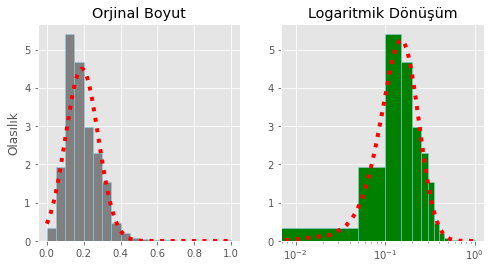

In [34]:
# Orjinal değişken
tarih = X_train[5].sort_values()
# dağılım eğrisi
mean, std = stats.norm.fit(tarih, loc=0)
pdf_norm = stats.norm.pdf(tarih, mean, std)

# logaritmik dağılım eğrisi
shape, loc, scale = stats.lognorm.fit(tarih, loc=0)
pdf_lognorm = stats.lognorm.pdf(tarih, shape, loc, scale)

# Grafikler
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Orjinal veriler ve dağılımı
ax1.hist(tarih, bins= 20 , density=True
         ,color = "grey", ec= "skyblue")

ax1.plot(tarih, pdf_norm
         ,color = "red", linewidth=4, linestyle=':')

ax1.set_ylabel('Olasılık')
ax1.set_title('Orjinal Boyut')

# Orjinal dağılıma göre log dönüşüm
ax2.hist(tarih, bins= 20, density=True
         ,color = "green", ec="skyblue")

ax2.plot(tarih, pdf_lognorm
         ,color = "red", linewidth=4, linestyle=':')

ax2.set_xscale('log')
ax2.set_title('Logaritmik Dönüşüm')
plt.show()

In [35]:
pdf_lognorm = pd.DataFrame(pdf_lognorm)

pdf_lognorm

0
0     7.6081e-03
1     2.8166e-02
2     1.4952e-01
3     3.2668e-01
4     3.4320e-01
5     3.4320e-01
6     3.4320e-01
7     3.4320e-01
8     3.4320e-01
9     3.4320e-01
10    3.4320e-01
11    4.1485e-01
12    5.9370e-01
13    5.9370e-01
14    5.9370e-01
15    5.9370e-01
16    5.9370e-01
17    6.3434e-01
18    6.4267e-01
19    7.2947e-01
20    8.2268e-01
21    8.2268e-01
22    8.2268e-01
23    8.7165e-01
24    9.7420e-01
25    1.0939e+00
26    1.0939e+00
27    1.1277e+00
28    1.1391e+00
29    1.1968e+00
30    1.3779e+00
31    1.4281e+00
32    1.4281e+00
33    1.4918e+00
34    1.5827e+00
35    1.5827e+00
36    1.6356e+00
37    1.6356e+00
38    1.6356e+00
39    1.6356e+00
40    1.6356e+00
41    1.7432e+00
42    1.7432e+00
43    1.7568e+00
44    1.7568e+00
45    1.7704e+00
46    1.8253e+00
47    1.8253e+00
48    1.8253e+00
49    1.8253e+00
50    1.8253e+00
51    1.8253e+00
52    1.8253e+00
53    1.8253e+00
54    1.8253e+00
55    2.0920e+00
56    2.2211e+00
57    2.2500e+00
58    2.2500e+00
59    2.2644e+00
60    2.2934e+00
61    2.3079e+00
62    2.4242e+00
63    2.4242e+00
64    2.4242e+00
65    2.4242e+00
66    2.4242e+00
67    2.4242e+00
68    2.4242e+00
69    2.4242e+00
70    2.4242e+00
71    2.4242e+00
72    2.4242e+00
73    2.4388e+00
74    2.4826e+00
75    2.5264e+00
76    2.5410e+00
77    2.5703e+00
78    2.5995e+00
79    2.5995e+00
80    2.5995e+00
81    2.6288e+00
82    2.6726e+00
83    2.6726e+00
84    2.7019e+00
85    2.7019e+00
86    2.7311e+00
87    2.7457e+00
88    2.7457e+00
89    2.7457e+00
90    2.7749e+00
91    2.7895e+00
92    2.7895e+00
93    2.8040e+00
94    2.8040e+00
95    2.8040e+00
96    2.8040e+00
97    2.8040e+00
98    2.8623e+00
99    2.8768e+00
100   2.9349e+00
101   2.9349e+00
102   2.9493e+00
103   2.9493e+00
104   3.0215e+00
105   3.0647e+00
106   3.0647e+00
107   3.1219e+00
108   3.1219e+00
109   3.1219e+00
110   3.1219e+00
111   3.1219e+00
112   3.1219e+00
113   3.1931e+00
114   3.1931e+00
115   3.2355e+00
116   3.2355e+00
117   3.2355e+00
118   3.2355e+00
119   3.2355e+00
120   3.2355e+00
121   3.2496e+00
122   3.2496e+00
123   3.2496e+00
124   3.3197e+00
125   3.3197e+00
126   3.3337e+00
127   3.3337e+00
128   3.3476e+00
129   3.3754e+00
130   3.4168e+00
131   3.4306e+00
132   3.4306e+00
133   3.4306e+00
134   3.4989e+00
135   3.4989e+00
136   3.5395e+00
137   3.5530e+00
138   3.5664e+00
139   3.5798e+00
140   3.5932e+00
141   3.6065e+00
142   3.6198e+00
143   3.6198e+00
144   3.6198e+00
145   3.6198e+00
146   3.6331e+00
147   3.6331e+00
148   3.6726e+00
149   3.7248e+00
150   3.7248e+00
151   3.7248e+00
152   3.7248e+00
153   3.7248e+00
154   3.7248e+00
155   3.7378e+00
156   3.7378e+00
157   3.7636e+00
158   3.7764e+00
159   3.7764e+00
160   3.7764e+00
161   3.7764e+00
162   3.7764e+00
163   3.7892e+00
164   3.7892e+00
165   3.8020e+00
166   3.8274e+00
167   3.8400e+00
168   3.8400e+00
169   3.8400e+00
170   3.8526e+00
171   3.8526e+00
172   3.8526e+00
173   3.8526e+00
174   3.8526e+00
175   3.9025e+00
176   3.9025e+00
177   3.9149e+00
178   3.9149e+00
179   3.9272e+00
180   3.9272e+00
181   3.9272e+00
182   3.9272e+00
183   3.9272e+00
184   3.9639e+00
185   3.9760e+00
186   3.9760e+00
187   4.0002e+00
188   4.0002e+00
189   4.0241e+00
190   4.0241e+00
191   4.0361e+00
192   4.0361e+00
193   4.0479e+00
194   4.0479e+00
195   4.0715e+00
196   4.0715e+00
197   4.0715e+00
198   4.0832e+00
199   4.0949e+00
200   4.1180e+00
201   4.1180e+00
202   4.1180e+00
203   4.1180e+00
204   4.1180e+00
205   4.1410e+00
206   4.1410e+00
207   4.1410e+00
208   4.1410e+00
209   4.1410e+00
210   4.1524e+00
211   4.1638e+00
212   4.1638e+00
213   4.1864e+00
214   4.1864e+00
215   4.1976e+00
216   4.1976e+00
217   4.2087e+00
218   4.2087e+00
219   4.2087e+00
220   4.2087e+00
221   4.2087e+00
222   4.2309e+00
223   4.2419e+00
224   4.2419e+00
225   4.2528e+00
226   4.2528e+00
227   4.2528e+00
228   4.2746e+00
229   4.2746e+00
230   4.2746e+00
231   4.2746e+00
232   4.2853e+00
233   4.2853e+00
234   4.2961e+00
235

### Karekök Dönüşümü (Square-Root Transformation)

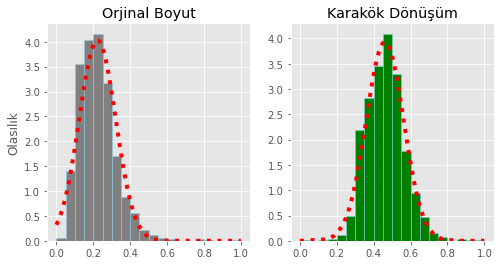

In [36]:
# Orjinal değişken
tarih = X_train[0].sort_values()

# karakök alınmış hali
tarih_sr = tarih ** (1/2)

# orjinal dağılım eğrisi
mean, std = stats.norm.fit(tarih, loc=0)
pdf_norm = stats.norm.pdf(tarih, mean, std)

# orjinal dağılım eğrisi
mean, std = stats.norm.fit(tarih_sr, loc=0)
pdf_norm_sk = stats.norm.pdf(tarih_sr, mean, std)


# Grafikler
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Orjinal veriler ve dağılımı
ax1.hist(tarih, bins= 20 , density=True
         ,color = "grey", ec= "skyblue")

ax1.plot(tarih, pdf_norm
         ,color = "red", linewidth=4, linestyle=':')

ax1.set_ylabel('Olasılık')
ax1.set_title('Orjinal Boyut')

# karakök dönüşüm grafiği
ax2.hist(tarih_sr, bins= 20, density=True
         ,color = "green", ec="skyblue")

ax2.plot(tarih_sr, pdf_norm_sk
         ,color = "red", linewidth=4, linestyle=':')

ax2.set_title('Karakök Dönüşüm')
plt.show()

### Python'da normal dağılım ile olasılık hesabı nasıl yapılır?

In [37]:
tarih = X_train[3].sort_values()

mean, std = stats.norm.fit(tarih, loc=0)

norm_prob = stats.norm(loc=mean, scale=std)

norm_prob.cdf(0.5)

0.6226399873083717

### Karşıt Dönüşüm (Reciprocal Transformation)

In [38]:
# Orjinal değişken
tarih = X_train[3].sort_values()

# tersine döndürülmüş hali
tarih_sr = 1 / tarih

# orjinal dağılım eğrisi
mean, std = stats.norm.fit(tarih, loc=0)
pdf_norm = stats.norm.pdf(tarih, mean, std)

# orjinal dağılım eğrisi
mean, std = stats.norm.fit(tarih_sr, loc=0)
pdf_norm_sk = stats.norm.pdf(tarih_sr, mean, std)

# Grafikler
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Orjinal veriler ve dağılımı
ax1.hist(tarih, bins= 20 , density=True
         ,color = "grey", ec= "skyblue")

ax1.plot(tarih, pdf_norm
         ,color = "red", linewidth=4, linestyle=':')

ax1.set_ylabel('Olasılık')
ax1.set_title('Orjinal Boyut')

# Karşıt dönüşüm grafiği
ax2.hist(tarih_sr, bins= 20, density=True
         ,color = "green", ec="skyblue")

ax2.plot(tarih_sr, pdf_norm_sk
         ,color = "red", linewidth=4, linestyle=':')

# ax2.set_xscale('Karakök')
ax2.set_title('Katşıt Dönüşüm')
plt.show()

RuntimeError: The data contains non-finite values.

### Box-Cox Dönüşümü

In [ ]:
pos_data = X_train[X_train[0] > 0]

tarih_sr, lam = stats.boxcox(pos_data[0].sort_values())

tarih = np.empty_like(X_train[0])

tarih[X_train[0] > 0] = tarih_sr

tarih[X_train[0] == 0] = -1/lam

In [ ]:
# Orjinal değişken
#tarih = pos_data[0].sort_values()

# tersine döndürülmüş hali
#tarih_sr, lam = stats.boxcox(tarih)

# orjinal dağılım eğrisi
mean, std = stats.norm.fit(tarih, loc=0)
pdf_norm = stats.norm.pdf(tarih, mean, std)

# Box-Cox dağılım eğrisi
mean, std = stats.norm.fit(tarih_sr, loc=0)
pdf_norm_sk = stats.norm.pdf(tarih_sr, mean, std)

# Grafikler
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Orjinal veriler ve dağılımı
ax1.hist(tarih, bins= 20 , density=True
         ,color = "grey", ec= "skyblue")

ax1.plot(tarih, pdf_norm
         ,color = "red", linewidth=4, linestyle=':')

ax1.set_ylabel('Olasılık')
ax1.set_title('Orjinal Boyut')

# Box-Cox dönüşüm grafiği
ax2.hist(tarih_sr, bins= 20, density=True
         ,color = "green", ec="skyblue")

ax2.plot(tarih_sr, pdf_norm_sk
         ,color = "red", linewidth=4, linestyle=':')

ax2.set_title('Box-Cox Dönüşüm')
plt.show()

# Machine Learning

In [ ]:
# Multiple Linear Regression
from sklearn.metrics import r2_score
import statsmodels.api as sm

print(X_train.shape)
print(X_test.shape)

columns = [1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19]

X_train = X_train.iloc[:, columns]
X_test = X_test.iloc[:, columns]

X_train_opt = pd.DataFrame(np.append(arr=np.ones((len(X_train), 1)).astype(int), values=X_train, axis=1)) 
X_test_opt = pd.DataFrame(np.append(arr=np.ones((len(X_test), 1)).astype(int), values=X_test, axis=1)) 

model = sm.OLS(endog=y_train, exog=X_train_opt.values).fit()

print(model.summary())


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print('Multiple Linear R2 Değeri')
print(r2_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

success = cross_val_score(estimator=lin_reg, X=X_train, y=y_train, cv=4)
print(success.mean())
print(success.std()) 

y_pred = lin_reg.predict(X_test)

print('Multiple Linear R2 Değeri')
print(r2_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

print(mean_absolute_error(y_test, y_pred))
# biz hataların üstünün alınmış hallerinin ortalamasını aldık(mean_squared_error) fakat bir de hataların gerçek değerlerini de alabiliriz(mean_absolute_error) bu da bize gerçek hata ne kadar çıkıyor onu görebiliriz bu da bize sapma için bir fikir verebilir. çıkan sayının iyi mi kötü mü olduğu kendi verimize göre değişir 

print(mean_squared_error(y_test, y_pred))
# burada üstünün alınmış halini aldık

In [ ]:
# Polynomial Regression
# örneğimiz polynomial şekilde değil de daha çok linear o yüzden Polynomial Regression'a gerek yok

In [ ]:
from sklearn.svm import SVR

svr_reg = SVR(C= 1000, gamma= 0.01, kernel= 'sigmoid')
svr_reg.fit(X_train, y_train)

y_pred = svr_reg.predict(X_test)

print('SVR R2 Değeri')
print(r2_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

svr_reg = SVR()

parameters = [{'C': [1, 2, 3, 4, 5], 'kernel': ['linear']},
             {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [1, 0.5, 0.1, 0.01, 0.001]}]

gs = GridSearchCV(estimator=svr_reg, 
                  param_grid=parameters,
                  cv=4)

y_train = pd.DataFrame(y_train).values.ravel()

grid_search = gs.fit(X_train, y_train) 
best_score = grid_search.best_score_ 
best_params = grid_search.best_params_

print(best_score)
print(best_params)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X_train, y_train)

y_pred = r_dt.predict(X_test)

print('Decision Tree R2 Değeri')
print(r2_score(y_test, y_pred))

In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=10, random_state=0)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

print('Random Forest Regression R2 Değeri')
print(r2_score(y_test, y_pred))

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()  # artık bu classifier'ın diğer classifier'lerden farkı yok yani artık sınıflandırma için
# kullanabiliriz
xgb_reg.fit(x_train, y_train)

y_pred = xgb_reg.predict(x_test)

print('XGBRegression R2 Değeri')
print(r2_score(y_test, y_pred))

from sklearn.metrics import mean_absolute_error, mean_squared_error 

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))